# **Import libraries**

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Dataset**

In [56]:
df = pd.read_csv('online_retail_II.csv')

In [57]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [58]:
df.tail(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


# **1,067,371 Rows before clean**

In [59]:
df.shape

(1067371, 8)

# **Check Null values**

In [60]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None


# **Null Value**
# **Description: 4382 rows**
# **ID: 243007 rows**

In [61]:
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


# **Fill Null Data**

In [62]:
df['Customer ID'] = df['Customer ID'].fillna('Unknown')

In [63]:
df_cleaned = df.dropna()

# **1,062,989  rows after clean NaN value**

In [64]:
print(df_cleaned.info())
print(df_cleaned.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1062989 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1062989 non-null  object 
 1   StockCode    1062989 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1062989 non-null  int64  
 4   InvoiceDate  1062989 non-null  object 
 5   Price        1062989 non-null  float64
 6   Customer ID  1062989 non-null  object 
 7   Country      1062989 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.0+ MB
None
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


# **Check nagative value**

In [65]:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0)]
df_cleaned = df_cleaned[(df['Price']) >= 0]

# **1,042,723 rows after clean negative value**

In [66]:
print(df_cleaned.info())
print(df_cleaned.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1042723 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1042723 non-null  object 
 1   StockCode    1042723 non-null  object 
 2   Description  1042723 non-null  object 
 3   Quantity     1042723 non-null  int64  
 4   InvoiceDate  1042723 non-null  object 
 5   Price        1042723 non-null  float64
 6   Customer ID  1042723 non-null  object 
 7   Country      1042723 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 71.6+ MB
None
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [68]:
df_cleaned['Total']= df_cleaned['Price'] *df_cleaned['Quantity']
df_cleaned.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0


In [69]:
print(df_cleaned.info())
print(df_cleaned.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1042723 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1042723 non-null  object 
 1   StockCode    1042723 non-null  object 
 2   Description  1042723 non-null  object 
 3   Quantity     1042723 non-null  int64  
 4   InvoiceDate  1042723 non-null  object 
 5   Price        1042723 non-null  float64
 6   Customer ID  1042723 non-null  object 
 7   Country      1042723 non-null  object 
 8   Total        1042723 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.6+ MB
None
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Total          0
dtype: int64


In [70]:
df_cleaned[['Quantity','Price','Total']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1042723.0,11.019149,127.689626,1.0,1.00,3.00,10.00,80995.00
Price,1042723.0,4.072925,51.423182,0.0,1.25,2.10,4.13,25111.09
Total,1042723.0,20.113653,203.015172,0.0,3.90,9.96,17.70,168469.60


# **5469 Products**

In [71]:
df_cleaned['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     5783
REGENCY CAKESTAND 3 TIER               4065
JUMBO BAG RED RETROSPOT                3395
ASSORTED COLOUR BIRD ORNAMENT          2939
PARTY BUNTING                          2742
                                       ... 
dotcomstock                               1
SET 10 CARDS SNOWY ROBIN 17099            1
SET 10 CARDS SWIRLY XMAS TREE 17104       1
amazon adjust                             1
PAPER CRAFT , LITTLE BIRDIE               1
Name: count, Length: 5469, dtype: int64

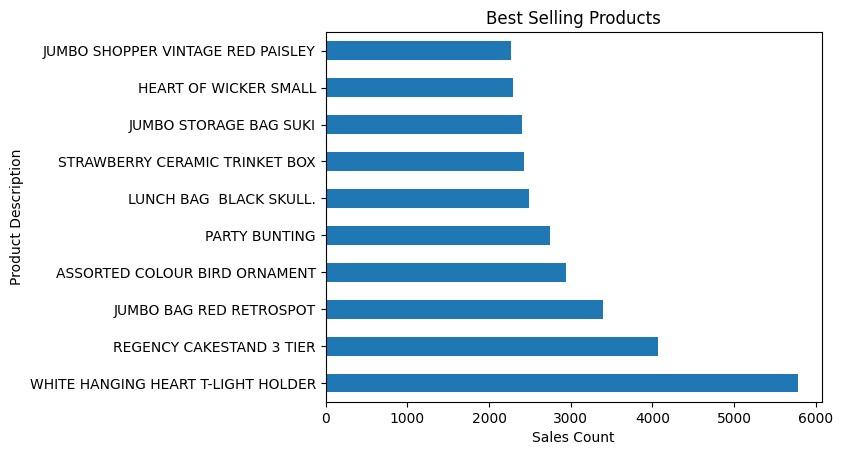

In [72]:
top_products=df_cleaned['Description'].value_counts().head(10)
top_products.plot(kind='barh')
plt.title('Best Selling Products')
plt.xlabel('Sales Count')
plt.ylabel('Product Description')
plt.show()

# **Check transaction by Year and Month**

In [73]:
# Convert "InvoiceDate" to datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Extract the year and month from the "InvoiceDate" column
df_cleaned['Year-Month'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Count the number of rows for each month
monthly_counts = df_cleaned.groupby('Year-Month').size()

# Display the result
print(monthly_counts)

# Calculate total
print("Total transaction: " + str(monthly_counts.sum()))

Year-Month
2009-12    43966
2010-01    30642
2010-02    28287
2010-03    40394
2010-04    33307
2010-05    33833
2010-06    38983
2010-07    32510
2010-08    32556
2010-09    41120
2010-10    57871
2010-11    76483
2010-12    63699
2011-01    34319
2011-02    27159
2011-03    35843
2011-04    29108
2011-05    36250
2011-06    36018
2011-07    38661
2011-08    34522
2011-09    49285
2011-10    59337
2011-11    83444
2011-12    25126
Freq: M, dtype: int64
Total transaction: 1042723


In [77]:
def plot_monthly_transactions(df_cleaned, year):
    # Convert "InvoiceDate" to datetime format if not already done
    df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

    # Extract the year and month from the "InvoiceDate" column
    df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

    # Count the number of rows for each month
    monthly_counts = df_cleaned.groupby('YearMonth').size()

    # Filter for the specified year
    monthly_counts_year = monthly_counts[monthly_counts.index.year == year]

    print(f"Total transactions: {monthly_counts_year.sum()}")

    # Plotting
    plt.figure(figsize=(12, 6))
    a = sns.barplot(x=monthly_counts_year.index.astype(str), y=monthly_counts_year.values, palette='viridis')
    plt.title(f'Monthly Transactions in {year}', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Transactions', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add transaction counts on top of the bars
    for p in a.patches:
        a.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

    plt.show()

# **43,966 transactions in 2009**

Total transactions: 43966


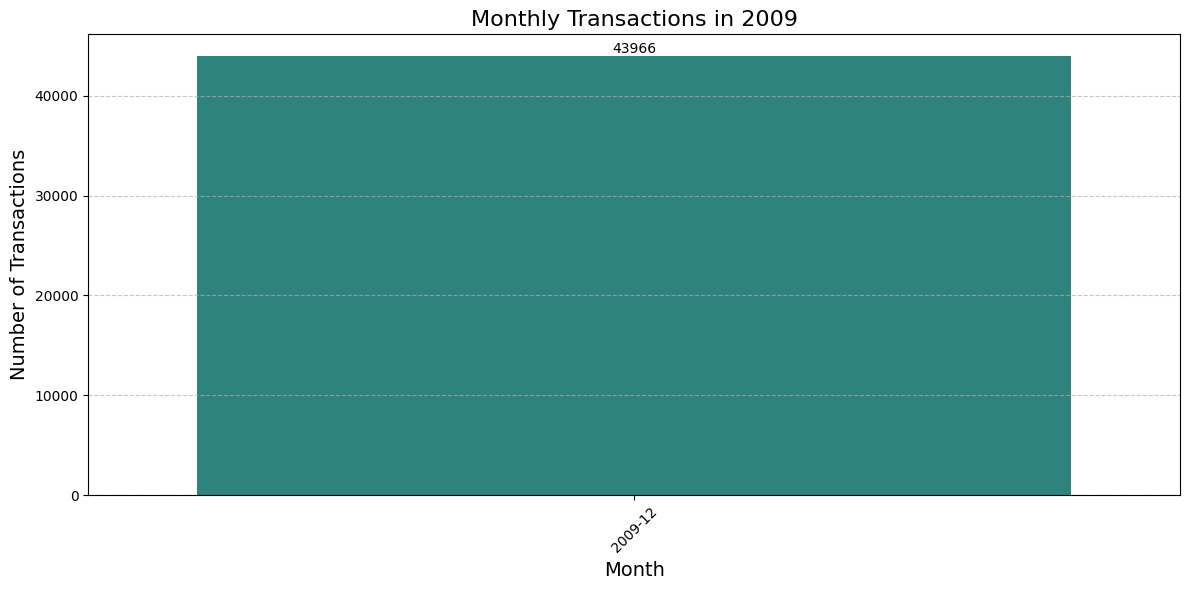

In [78]:
plot_monthly_transactions(df_cleaned, 2009)

# **509,685 transactions in 2010**

Total transactions: 509685


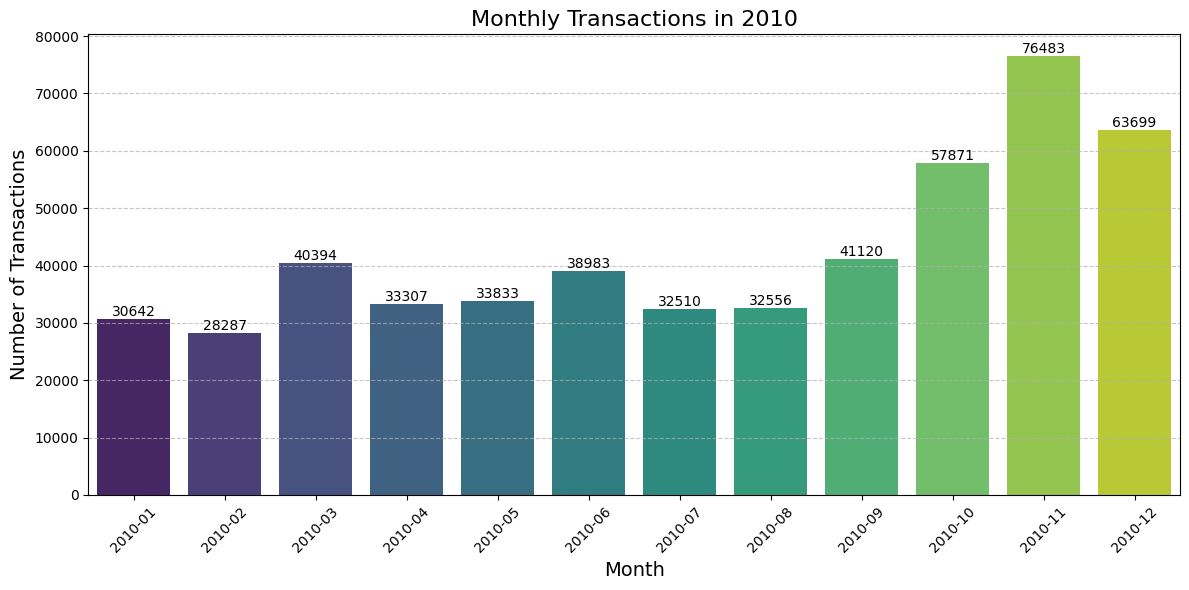

In [79]:
plot_monthly_transactions(df_cleaned, 2010)

# **489,072 transactions in 2011**

Total transactions: 489072


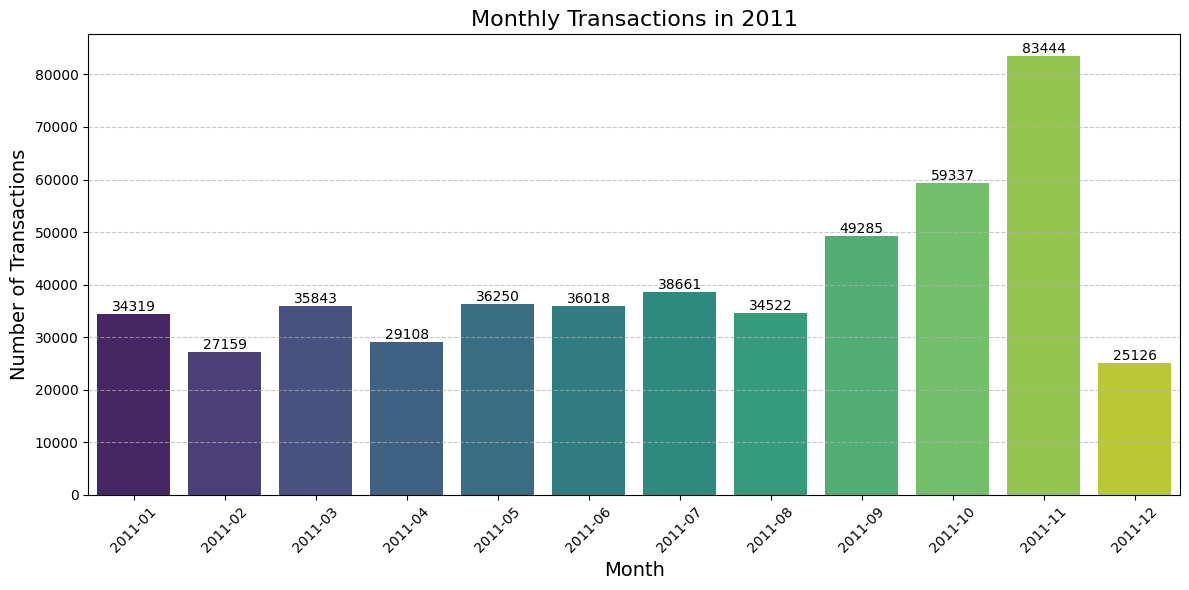

In [80]:
plot_monthly_transactions(df_cleaned, 2011)

<Axes: xlabel='Price', ylabel='Quantity'>

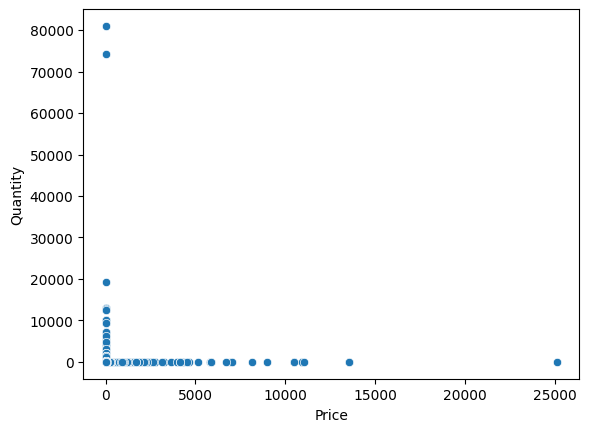

In [81]:
sns.scatterplot(x='Price',y='Quantity',data=df_cleaned)

In [82]:
!git clone https://github.com/Ali-Riza-Akoglu/arizacom.git

fatal: destination path 'arizacom' already exists and is not an empty directory.


In [83]:
import sys
sys.path.append('arizacom')

from arizacom.data_processing import trend
from arizacom.visualization import *

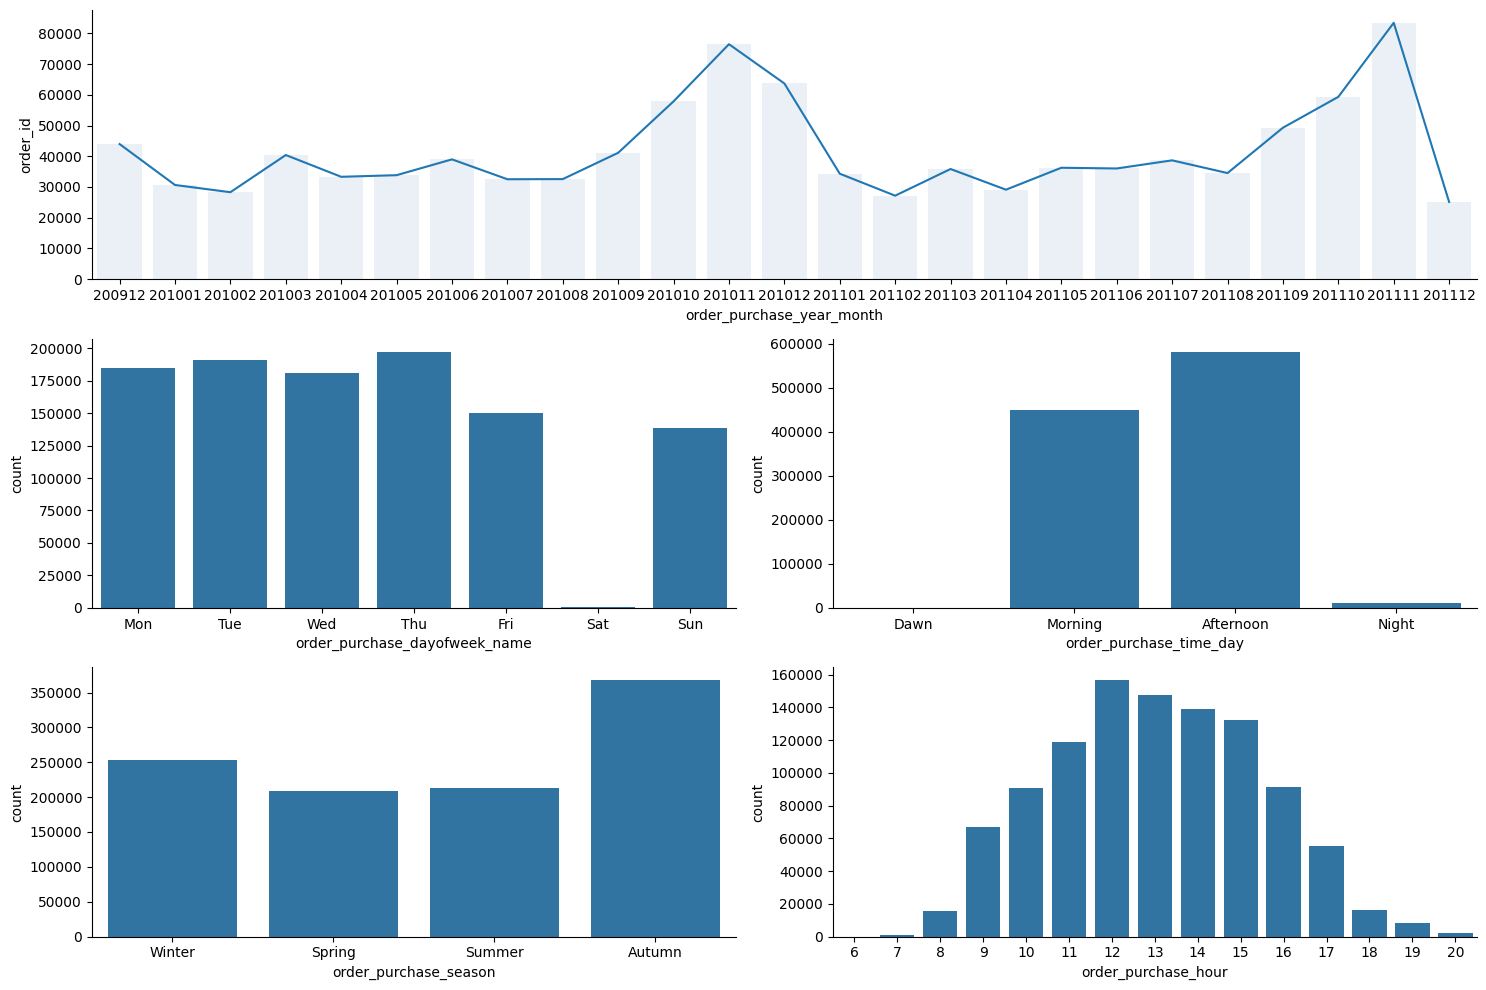

In [84]:
trend_fig(df_cleaned['InvoiceDate'])

In [85]:
top_10_fig(df_cleaned,'Description','Quantity')

In [87]:
trend(df_cleaned['InvoiceDate'])

,order_purchase_timestamp,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,order_purchase_season
0,2009-12-01 07:45:00,2009,12,Dec,200912,20091201,1,1,Tue,7,Morning,Winter
1,2009-12-01 07:45:00,2009,12,Dec,200912,20091201,1,1,Tue,7,Morning,Winter
2,2009-12-01 07:45:00,2009,12,Dec,200912,20091201,1,1,Tue,7,Morning,Winter
3,2009-12-01 07:45:00,2009,12,Dec,200912,20091201,1,1,Tue,7,Morning,Winter
4,2009-12-01 07:45:00,2009,12,Dec,200912,20091201,1,1,Tue,7,Morning,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,2011-12-09 12:50:00,2011,12,Dec,201112,20111209,9,4,Fri,12,Morning,Winter
1067367,2011-12-09 12:50:00,2011,12,Dec,201112,20111209,9,4,Fri,12,Morning,Winter
1067368,2011-12-09 12:50:00,2011,12,Dec,201112,20111209,9,4,Fri,12,Morning,Winter
1067369,2011-12-09 12:50:00,2011,12,Dec,201112,20111209,9,4,Fri,12,Morning,Winter


In [89]:
df_cleaned.to_csv("final_cleaned_dataset.csv")